# Продвинутое машинное обучение: 
# Домашнее задание 3

## 1. Реализуйте базовый частотный метод по Шерлоку Холмсу:
- подсчитайте частоты букв по корпусам (пунктуацию и капитализацию можно просто опустить, а вот пробелы лучше оставить);
- возьмите какие-нибудь тестовые тексты (нужно взять по меньшей мере 2-3 предложения, иначе вряд ли сработает), зашифруйте их посредством случайной перестановки символов;
- расшифруйте их таким частотным методом.


Считываем корпус данных для подсчета статистики встречаемости букв

In [50]:
import pandas as pd
import numpy as np
from collections import Counter
from tqdm.notebook import tqdm
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
big_corpus = ''

with open('AnnaKarenina.txt', encoding='utf-8') as f:
    corpus = f.read().lower()
big_corpus += corpus

with open('WarAndPeace.txt', encoding='utf-8') as f:
    corpus = f.read().lower()    
big_corpus += corpus

Определим символы, по которым будем фильтровать текст

In [5]:
chars = np.sort(np.array(list(set(' '.join([chr(i) for i in range(ord('а'), ord('а') + 32)])))))
chars

array([' ', 'а', 'б', 'в', 'г', 'д', 'е', 'ж', 'з', 'и', 'й', 'к', 'л',
       'м', 'н', 'о', 'п', 'р', 'с', 'т', 'у', 'ф', 'х', 'ц', 'ч', 'ш',
       'щ', 'ъ', 'ы', 'ь', 'э', 'ю', 'я'], dtype='<U1')

Напишем вспомогательные функции:
- получения статистик по n-граммам
- создания словаря по корпусу данных
- кодирования и декодирования текста - по факту просто отображения символов из одного распределения в символы другого распределения
- расчета точности дешифрования

In [6]:
def get_n_grams(corpus: str, filter: set, n: int) -> list:
    ans = list()
    
    if filter is not None:
        filtered = ''
        for i in corpus:
            if i in filter:
                filtered += i
            else:
                filtered += ' '
    else:
        filtered = corpus
        
    for i in range(len(filtered) - n + 1):
        ans.append(filtered[i:i + n])
        
    return ans

In [7]:
def create_dict(big_corpus: list):
    ans = Counter(big_corpus)

    chars_counts = list()
    for i in ans.keys():
        chars_counts.append([i, ans[i]])
        
    chars_counts.sort(key = lambda i: i[1], reverse=True)
    
    return chars_counts

In [163]:
def decode(source: list, code: list):
    return {
        source[i] : code[i] for i in range(len(code))
    }

In [9]:
def encode(text: str, abc: list):
    code = abc.copy()
    np.random.shuffle(code)
    
    encoder = {
        abc[i] : code[i] for i in range(len(abc))
        
    }

    enc_text = ''
    for i in text:
        enc_text += encoder[i]
    
    return enc_text, code

In [89]:
def accuracy(x, y):
    ans = 0
    for i in range(len(y)):
        if x[i] == y[i]:
            ans += 1
            
    return ans / len(x)

У меня остался корпус из домашнего задания по NLP с Евгением Онегиным, решил его использовать в качестве тестового текста. Можно взять, например первые 1000 символов произведения.

In [34]:
with open('onegin.txt', encoding='utf-8') as f:
    corpus = f.read().lower()
    
filtered_text =''
for i in corpus[0:1000]:
    if i == '\n':
        i = ' '
    if i in chars:
        filtered_text += i    

Закодируем текст. Дополнительно из функции возвращал множество символов в которое отобразился исходный текст для отладки во время выполнения домашнего задания

In [17]:
enc_text, sign = encode(filtered_text, chars)
print("Зашифрованное сообщение: ", enc_text)
print("Код: ", *sign)

Зашифрованное сообщение:  дддуцидмфмфджлукыдзпжьйкыдщэлвч днцъмлдйпдвдгшьншдслйпуцъдцйдшвлбльюджпрфдслжьлвч дчд шзгпдвкмшульюдйпдуцъдпъцдщэчупэдмэшъчудйлшнлдйцдрцбпдуциднлнлфджншнлдждрц юйкуджчмпьюдчдмпйюдчдйцзюдйпдцьыцмфдйчдглъшдщэцзюднлнцпдйчснцпднцвлэжьвцдщц шбчвцъцдслрлв фьюдпушдщцмшгнчдщцщэлв фьюдщпзл юйцдщцмйцжчьюд пнлэжьвцдвсмкыльюдчдмшульюдщэцджпрфднцъмлдбпдзпэьдвцсюупьдьпрфддддддьлндмшул дуц цмцидщцвпжлд пьфдвдщк чдйлдщцзьцвкыдвжпвкгйпидвц птдспвпжлдйлж пмйчндвжпыджвцчыдэцмйкыддмэшсюфд тмуч кдчдэшж лйлдждъпэцпудуцпъцдэцулйлдрпсдщэпмчж цвчиджпидбпдзлждщцсвц юьпдщцсйлнцучьюдвлждцйпъчйдмцрэкидуцидщэчфьп юдэцмч жфдйлдрэпълыдйпвкдъмпдуцбпьдркьюдэцмч чжюдвкдч чдр чжьл чдуцидзчьльп юдьлудйпнцъмлдъш ф дчдфдйцдвэпмпйджпвпэдм фдупйфдддддж шбчвдць чзйцр лъцэцмйцдмц ълучдбч дпъцдцьпедмлвл дьэчдрл лдпбпъцмйцдчдщэцуцьл жфдйлнцйпеджшмюрлдпвъпйчфдыэлйч лджщпэвлддслдйчудыцмч лдщцьцуддппджупйч д
Код:  д л р в ъ м п б с ч и н   у й ц щ э ж ь ш я ы е з г а х к ю о т ф


Предобучимся по корпусу "Война и мир" и "Анна Каренина"

In [18]:
N_GRAM = 1
big_dict = create_dict(get_n_grams(big_corpus, chars, N_GRAM))

Посмотрим статистику топ-5 - ожидаемо, больше всего в тексте пробелов, букв О, Е и А.

In [22]:
big_dict[0:5]

[[' ', 580964], ['о', 223691], ['е', 166169], ['а', 162313], ['н', 133258]]

Частотный метод реализовал следующим способом:
- Для зашифрованного текста посчитаем н-граммы
- Посчитаем статистики для полученных н-грамм в тексте
- Отобразим символы из одного множества в другое по популярности
- ???
- PTOFIT!!!

In [23]:
def freq_analys(enc: str, decode_dict: list, n_grams: int):
    enc = get_n_grams(enc, None, n_grams)
    ans = Counter(enc)

    enc_counts = list()
    for i in ans.keys():
        enc_counts.append([i, ans[i]])

    enc_counts.sort(key = lambda i: i[1], reverse=True)
    enc_counts
    
    ans_dict = {
        enc_counts[i][0] : decode_dict[i][0] for i in range(len(enc_counts))
    }
    
    ans = ''
    for i in enc:
        ans += ans_dict[i]
    ans
    
    return ans

In [26]:
decode_text = freq_analys(enc_text, big_dict, N_GRAM)[0:1000]
decode_text

'   кой ляля ракыч жерстыч удавни ьопла те в хгсьг затекоп от гвашасм ребя зарсавни н игжхе вылгкасм те коп епо уднкед лдгпнк тагьа то боше кой ьаьая рьгьа р боимтык рнлесм н летм н тожм те осчоля тн хапг удожм ьаьое тнзьое ьовадрсво уоигшнвопо забавиясм екг уолгхьн уоудавиясм уежаимто уолторнсм иеьадрсво взлычасм н лгкасм удо ребя ьопла ше жедс возмкес себя      саь лгкаи коиолой уовера иеся в уыин та уожсовыч вревыхтей воиею зевера тариелтнь вреч рвонч долтыч  лдгзмя июлкниы н дгриата р педоек коепо доката без уделнриовнй рей ше жар уозвоимсе уозтаьокнсм вар отепнт лобдый кой уднясеим долниря та бдепач тевы пле кошес бысм долнинрм вы нин бинрсаин кой жнсасеим сак теьопла пгияи н я то вделет ревед лия кетя     ригшнв осинжтобиаподолто лоипакн шни епо осеэ лаваи сдн баиа ешеполто н удокосаиря таьотеэ рглмба евпетня чдатниа руедва  за тнк чолниа уосок  ее ркетни '

In [27]:
print("Точность: ", accuracy(filtered_text, decode_text))

Точность:  0.5211912943871707


Точность получилась близкая к подбрасыванию монеты, не очень хороший результат:(

## Вряд ли в результате получилась такая уж хорошая расшифровка, разве что если вы брали в качестве тестовых данных целые рассказы. Но и Шерлок Холмс был не так уж прост: после буквы E, которая действительно выделяется частотой, дальше он анализировал уже конкретные слова и пытался угадать, какими они могли бы быть. Я не знаю, как запрограммировать такой интуитивный анализ, так что давайте просто сделаем следующий логический шаг:
- подсчитайте частоты биграмм (т.е. пар последовательных букв) по корпусам;
- проведите тестирование аналогично п.1, но при помощи биграмм.

Тут все функции для задачи были уже написаны в первом пункте, так что нужно просто пересчитать статистику по корпусу для биграмм и запустить частотный анализ

In [28]:
N_GRAM = 2
big_dict = create_dict(get_n_grams(big_corpus, chars, N_GRAM))
decode_text = freq_analys(enc_text, big_dict, N_GRAM)[0:1000]
decode_text

'е е  кя  чне и гид г с немсеужлоовантринтьокеслоов  потиолитнаниел тлариого а ал п одотвднекглаяасерилт алегя ланув лью очты мкркуорсти  н д лвс серилдетьм олитнанико ватоб хсиих п олижаы чеодорсти а ал п кя лануенво бто  помоойвеваам ируавживыойроа онятслу о а катол ылейре п кя  чнеелу зау ий с нтуаяслу о  накл ылотн аресвнро недрыет зсти ко в иеттаыйи ко ва ка асои а ал пв скщеиеь  г са й  втвчиоеисас  поно асои елу за тви па й ошлс тви пел тда м ждитьшерато  гоотобхос чарала бтоерилымсяолпеазнысти енегепас  гоь ы улебмн в  голупотиолпеазнысти   евньадпрн аркато  гоь текаькедсьсти атчтняу  ждитьшерато опаажезлоуторсти ко в иы чеодорсти   поното н д лвс сел тлариого ннре пантрваьнме орах  яз ве зме у е лвс се е е е е  ум забо иы чеодпрни кя отбеь ми чне  года эинемо атчт збр с одо  умвшос ва оно   го аопеедалилоов озн домлиускналожне ораотчтгдугерувом эинемо а онде рчтимтей шабо озн дбуов нтнралыд овленоь тееслоове  ируавжн яыв сатицаеозкинауюэтко влеавлю рк т оно  накивсввановиегро 

In [29]:
print("Точность: ", accuracy(filtered_text, decode_text))

Точность:  0.06529209621993128


Тут у меня получился результат намного хуже, если в первом случае можно было выделить структуру текста, понять где точно находятся пробелы и увидеть некоторые слова, похожие на слова из оригинала, то при биграммах и это развалилось. Я сделал вывод, что количество биграмм намного больше, чем символов и сложно просто взять и отобразить одно множество в другое по популярности. Кроме этого, длины сообщения может не хватать для того, чтобы подсчитанные статистики были адекватными

## Но и это ещё не всё: биграммы скорее всего тоже далеко не всегда работают. Основная часть задания — в том, как можно их улучшить:
- предложите метод обучения перестановки символов в этом задании, основанный на MCMC-сэмплировании, но по-прежнему работающий на основе статистики биграмм;
- реализуйте и протестируйте его, убедитесь, что результаты улучшились.


Наша цель состоит в поиске такой упорядоченной последовательности букв, которая дала бы нам максимальную точность при расшифровывании сообщения. Очевидно, что мы можем просто методом грубой силы перебирать все возможные варианты перестановок, но это слишком долго, до дедлайна по дз точно не успеть. Можно применить МСМС-сэмплирование!
За основу возьмем алгоритм, описанный в Бишопе "Распознавание образов и машинное обучение" в главе 11.5.2.
Можно решить задачу следующим способом:
- Делаем потенциальную перестановку 2 случайных символов, равнозначное переходу в новое состояние - это будет наше сэмплирование;
- Для текущей последовательности символов и для потенциальной рассчитываем статистики на зашифрованном тексте (правдоподобие);
- Получаем оценку состояния. Я считал ее следующим образом. У нас есть априорное распределение, полученное на основе тектов "Война и Мир" и "Анна Каренина", и есть правдоподобие. Возьмем сумму произведений частот из этих двух распределений каждой n-граммы - это и будет оценка нашего состояния;

    $$Score(next, original) =  F_{original} \bullet F_{next} $$


- Если для потенциального состояния полученная оценка выше, чем для текущего, то просто переходим в него;
- Если это не так, то как описано в 11.5.2, где говорится, что потенциальное состояние может приняться с определенной вероятьностью, равной min(1, exp(current - next));
- и так продолжаем, пока наш алгоритм куда то не сойдется.

Задача непростая, потому что нету четкого понимания, когда нужно остановиться и мы всегда начинаем со случайного начального состояния, поэтому результаты от запуска к запуску будут отличаться

In [84]:
def score(prob_set, original_set):
    ans = 1
    
    for i in prob_set.keys():
        if i in tmp:
            ans += prob_set[i]  * original_set[i]
            
    return ans

In [71]:
N_GRAM = 2
big_dict = create_dict(get_n_grams(big_corpus, chars, N_GRAM))
dict_to_mcmc = {

        big_dict[i][0] : big_dict[i][1] for i in range(len(big_dict))
    }    

In [118]:
def mcmc_analys(n_gram, enc_text, original_dict, epochs=10000):
    current_state = np.array(list(chars))
    history = []

    for epochs in tqdm(range(epochs)):
        first_pos = 0
        second_pos = 0
        while first_pos == second_pos:
            first_pos = np.random.randint(0, current_state.shape[0] - 1)
            second_pos = np.random.randint(0, current_state.shape[0] - 1)

        next_state = current_state.copy()
        next_state[[first_pos, second_pos]] = next_state[[second_pos, first_pos]]
        dec_dict = decode(chars, current_state)
        ans = ''
        for i in enc_text:
            ans += dec_dict[i]

        prob = create_dict(get_n_grams(ans, chars, N_GRAM)) 
        prob_dict = {

        prob[i][0] : prob[i][1] for i in range(len(prob))
        }

        cur_score = score(prob_dict, original_dict)  


        dec_dict = decode(chars, next_state)
        ans = ''
        for i in enc_text:
            ans += dec_dict[i]

        prob = create_dict(get_n_grams(ans, chars, N_GRAM))

        prob_dict = {

            prob[i][0] : prob[i][1] for i in range(len(prob))
        }

        next_score = score(prob_dict, original_dict)  

        acept = min(1, np.exp(next_score - cur_score))
        if cur_score > next_score:
            best_state = current_state
        if acept > np.random.uniform(0,1):
            current_state = next_state.copy()

        history.append(cur_score)

        if epochs % 1000 == 0:
            clear_output(True)
            plt.plot(history, label="loss")
            plt.legend()
            plt.show() 

            print(np.sum(history) / len(history))        

            dec_dict = decode(chars, current_state)
            ans = ''
            for i in enc_text:
                ans += dec_dict[i]

            print(epochs, ans)
            
    return ans

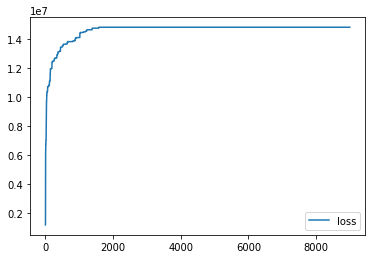

-175285.58515720477
9000    мой дуду самых честных правил когда не в эюткю занемог он юважать себу заставил и лючэе выдюмать не мог его пример дрюгим наюка но боже мой какау скюка с больным сидеть и день и ночь не отходу ни эагю прочь какое низкое коварство полюживого забавлуть емю подюэки поправлуть печально подносить лекарство вздыхать и дюмать про себу когда же черт возьмет тебу      так дюмал молодой повеса лету в пыли на почтовых всевыэней волещ зевеса наследник всех своих родных  дрюзьу лщдмилы и рюслана с героем моего романа без предисловий сей же час позвольте познакомить вас онегин добрый мой приутель родилсу на брегах невы где может быть родились вы или блистали мой читатель там некогда гюлул и у но вреден север длу мену     слюжив отличноблагородно долгами жил его отеш давал три бала ежегодно и промоталсу наконеш сюдьба евгениу хранила сперва  за ним ходила потом  ее сменил 

Точность:  0.8854524627720504


In [85]:
print("Точность: ", accuracy(filtered_text, mcmc_analys(n_gram=2, enc_text=enc_text, original_dict=dict_to_mcmc)))

Оценку можно поменять. Например, она будет не очень удобной, если мы будем реализовывать алгоритм на ЯП без поддержки больших чисел, нам придется контролировать переполнение. 
Как вариант, можно оценить текущее состояние следующим образом:

$$Score(next, original) = \Pi F_{original}^{F_{next}} $$

Очевидно, что такая оценка будет выше, чем более похожее состояние к оригинальному мы получим. Для удобства расчетов прологарифмируем ее:

$$Score(next, original) = \Sigma \log_2 F_{original} \bullet {F_{next}} $$

In [130]:
def score(prob_set, original_set):
    ans = 1
    
    for i in prob_set.keys():
        if i in tmp:
            ans += prob_set[i]  * np.log(original_set[i])
            
    return ans

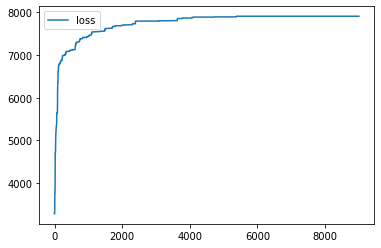

7742.296354434655
9000    мой дюдю самых честных правил когда не в шутку занемог он уважать себю заставил и лучше выдумать не мог его пример другим наука но боже мой какаю скука с больным сидеть и день и ночь не отходю ни шагу прочь какое низкое коварство полуживого забавлють ему подушки поправлють печально подносить лекарство вздыхать и думать про себю когда же черт возьмет тебю      так думал молодой повеса летю в пыли на почтовых всевышней волещ зевеса наследник всех своих родных  друзью лщдмилы и руслана с героем моего романа без предисловий сей же час позвольте познакомить вас онегин добрый мой приютель родилсю на брегах невы где может быть родились вы или блистали мой читатель там некогда гулюл и ю но вреден север длю меню     служив отличноблагородно долгами жил его отец давал три бала ежегодно и промоталсю наконец судьба евгению хранила сперва  за ним ходила потом  ее сменил 

Точность:  0.9759450171821306


In [69]:
print("Точность: ", accuracy(filtered_text, mcmc_analys(n_gram=2, enc_text=enc_text, original_dict=dict_to_mcmc)))

Оценка получается выше!

## Расшифруйте сообщение:
←⇠⇒↟↹↷⇊↹↷↟↤↟↨←↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↟⇒↟↹⇷⇛⇞↨↟↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↨←⇌⇠↨↹⇙↹⇸↨⇛↙⇛↹⇠⇛⇛↲⇆←↝↟↞↹⇌⇛↨⇛⇯⇊↾↹⇒←↙⇌⇛↹⇷⇯⇛⇞↟↨⇴↨⇈↹⇠⇌⇛⇯←←↹↷⇠←↙⇛↹↷⇊↹↷⇠←↹⇠↤←⇒⇴⇒↟↹⇷⇯⇴↷↟⇒⇈↝⇛↹↟↹⇷⇛⇒⇙⇞↟↨←↹↳⇴⇌⇠↟↳⇴⇒⇈↝⇊↾↹↲⇴⇒⇒↹⇰⇴↹⇷⇛⇠⇒←↤↝←←↹⇞←↨↷←⇯↨⇛←↹⇰⇴↤⇴↝↟←↹⇌⇙⇯⇠⇴↹↘⇛↨↞↹⇌⇛↝←⇞↝⇛↹↞↹↝↟⇞←↙⇛↹↝←↹⇛↲←⇆⇴⇏

Или это (они одинаковые, второй вариант просто на случай проблем с юникодом):
დჳჵჂႨშႼႨშჂხჂჲდႨსႹႭჾႣჵისႼჰႨჂჵჂႨႲႹႧჲჂႨსႹႭჾႣჵისႼჰႨჲდႩჳჲႨჇႨႠჲႹქႹႨჳႹႹჱჶდსჂႽႨႩႹჲႹႭႼჰႨჵდქႩႹႨႲႭႹႧჂჲႣჲიႨჳႩႹႭდდႨშჳდქႹႨშႼႨშჳდႨჳხდჵႣჵჂႨႲႭႣშჂჵისႹႨჂႨႲႹჵჇႧჂჲდႨჾႣႩჳჂჾႣჵისႼჰႨჱႣჵჵႨეႣႨႲႹჳჵდხსდდႨႧდჲშდႭჲႹდႨეႣხႣსჂდႨႩჇႭჳႣႨႾႹჲႽႨႩႹსდႧსႹႨႽႨსჂႧდქႹႨსდႨႹჱდჶႣნ


Для удобства отобразим символы в алфавит русского языка

In [ ]:
string = '←⇠⇒↟↹↷⇊↹↷↟↤↟↨←↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↟⇒↟↹⇷⇛⇞↨↟↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↨←⇌⇠↨↹⇙↹⇸↨⇛↙⇛↹⇠⇛⇛↲⇆←↝↟↞↹⇌⇛↨⇛⇯⇊↾↹⇒←↙⇌⇛↹⇷⇯⇛⇞↟↨⇴↨⇈↹⇠⇌⇛⇯←←↹↷⇠←↙⇛↹↷⇊↹↷⇠←↹⇠↤←⇒⇴⇒↟↹⇷⇯⇴↷↟⇒⇈↝⇛↹↟↹⇷⇛⇒⇙⇞↟↨←↹↳⇴⇌⇠↟↳⇴⇒⇈↝⇊↾↹↲⇴⇒⇒↹⇰⇴↹⇷⇛⇠⇒←↤↝←←↹⇞←↨↷←⇯↨⇛←↹⇰⇴↤⇴↝↟←↹⇌⇙⇯⇠⇴↹↘⇛↨↞↹⇌⇛↝←⇞↝⇛↹↞↹↝↟⇞←↙⇛↹↝←↹⇛↲←⇆⇴⇏'

In [153]:
t_abc = list(set(string))
t_dict = {
    t_abc[i] : chars[i] for i in range(len(t_abc))
}

enc_text = ''
for i in string:
    enc_text += t_dict[i]
    
enc_text

'щчзмкгекгмнмдщкуфлтцзвуепкмзмкафсдмкуфлтцзвуепкдщичдкбкждфхфкчффрощум кифдфлепкзщхифкалфсмдцдвкчифлщщкгчщхфкгекгчщкчнщзцзмкалцгмзвуфкмкафзбсмдщктцичмтцзвуепкрцззкшцкафчзщнущщксщдгщлдфщкшцнцумщкиблчцкъфд кифущсуфк кумсщхфкущкфрщоцй'

Попробуем расшифровать на биграммах

In [161]:
N_GRAM = 2
big_dict = create_dict(get_n_grams(big_corpus, chars, N_GRAM))
dict_to_mcmc = {

        big_dict[i][0] : big_dict[i][1] for i in range(len(big_dict))
    }    

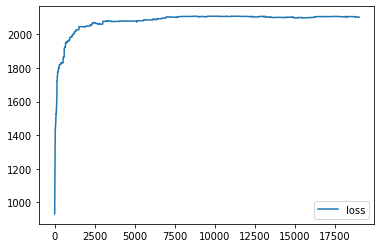

2079.131016594664
19000 если вы вимите норжальный или почти норжальный текст у этого соодшению который легко прочитать скорее всего вы все смелали правильно и получите жаксижальный далл за послемнее четвертое замание курса хотю конечно ю ничего не одешаб



'ески вы видите норжакьный ики почти норжакьный телст у этого сообшеним лоторый кегло прочитать слорее всего вы все сдекаки правикьно и покучите жалсижакьный бакк за поскеднее четвертое задание лурса хотм лонечно м ничего не обешаф'

In [165]:
mcmc_analys(n_gram=2, enc_text=enc_text, original_dict=dict_to_mcmc, epochs=20000)

Видимо оригинальное сообщение:

In [ ]:
original_text = 'если вы видите нормальный или почти нормальный текст у этого сообщению который легко прочитать скорее всего вы все сделали правильно и получите максимальный балл за последнее четвертое задание курса хотя конечно я ничего не обещаю'

In [166]:
decode_text = 'ески вы видите норжакьный ики почти норжакьный телст у этого сообшеним лоторый кегло прочитать слорее всего вы все сдекаки правикьно и покучите жалсижакьный бакк за поскеднее четвертое задание лурса хотм лонечно м ничего не обешаф'

In [167]:
accuracy(original_text, decode_text)

0.8695652173913043

Попробуем расшифровать на триграммах

In [139]:
N_GRAM = 3
big_dict = create_dict(get_n_grams(big_corpus, chars, N_GRAM))
dict_to_mcmc = {

        big_dict[i][0] : big_dict[i][1] for i in range(len(big_dict))
    }    

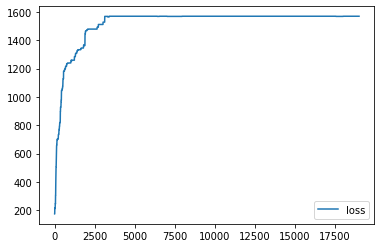

1519.8039005738594
19000 если вы видите нормальный или почти нормальный текст у этого сообщению который легко прочитать скорее всего вы все сделали правильно и получите максимальный балл за последнее четвертое задание курса хотю конечно ю ничего не обещаъ



'если вы видите нормалюный или почти нормалюный текст у этого сообщениь который легко прочитатю скорее всего вы все сделали правилюно и получите максималюный балл за последнее четвертое задание курса хоть конечно ь ничего не обещаж'

In [154]:
mcmc_analys(n_gram=3, enc_text=enc_text, original_dict=dict_to_mcmc, epochs=20000)

In [158]:
decode_text = 'если вы видите нормальный или почти нормальный текст у этого сообщению который легко прочитать скорее всего вы все сделали правильно и получите максимальный балл за последнее четвертое задание курса хотю конечно ю ничего не обещаъ'

In [159]:
accuracy(original_text, decode_text)

0.9869565217391304

На триграммах получили ошибку только в буквах ю и я

З.Ы. На самом деле, чтобы получить такой результат пришлось очень много раз перезапускать алгоритм, так как он очень зависим от начального состояния и того куда мы будем переходить

## Бонус: какие вы можете придумать применения для этой модели? Пляшущие человечки ведь не так часто встречаются в жизни (хотя встречаются! и это самое потрясающее во всей этой истории, но об этом я расскажу потом).

Именно для задачи с текстами, возможно в ситуации с испорченной кодировкой, когда вместо оригинальных символов отображаются некие иероглифы и прочитать его невозможно

Еще идея, но просто относительно алгоритма, без привязки к тестам: у меня есть обученная модель, которую можно использовать. Но порядок фичей для нее перепутан, информация в каком порядке нужно подавать данные утеряна. Можно использовать такой алгоритм, переставлять фичи и пытаться максимизировать скор.

## Выводы

Домашнее задание очень интересное, в процессе пересмотрел две лекции, по кодированию и передаче сообщений и по сэмплированию. Удалось на практике разобраться как это работает.
Дополнительно изучил, что писал об этом Бишоп. 

Спасибо вам за полученные знания!